[Get Playlist Tracks](https://developer.spotify.com/console/get-playlist-tracks/)

In [39]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('data/songs_lol.json') as json_data:
    d = json.load(json_data)

In [29]:
song_ids = []
song_names = []

for item in d['items']:
    song_ids.append(item['track']['id'])
    song_names.append(item['track']['name'])

print('Song IDs:')
print(*song_ids, sep=',')

Song IDs:
5sbooPcNgIE22DwO0VNGUJ,69Sy7207dnixZ6w7RSV9Kb,04pjfS3YIK6gXjxi1zHeZa,50cSs6d03KV85oKytBmin9,17hcFa5JZWpaSJ36Bi3nTw,6lGyziqFnIEnZCrBMTuije,32IMcJ5pQ71rOFD0bIdneJ,7xLA7JuahNmSTYqPbL3A42,5idcnkpOPTBhbzb5jTo6uH,2MTWR1QSHAQY8GPrxqFuuV,3pqTtHzszTsy5a2fAa00ne,5VDiKRflCPqiUHtq5OCtX8,25gOpuSDC81sqdipz6SUiO,6s0yNmp4Hd32wGx40T6uL8,1p1FlZKTBBkI6618JN8J9B,4in7zJCCbHJeU5nyvtdoH3,1HxsLny2BRme3bjBzkYCqU,7ouVXhXNlAuTgvG8DwSXC5,1zEpbtg0SO7SsprPKJVHb9,6cQJy6DAlCOWytorgWtBhL,0HFUgGLJNa738pJ1BFf9mV,4VMCXK64FTwROe4qrXhVwA,6B45Rrz6M9VPBX5zvuvV2c,1ZsBcTuBtv9qkHabiwkBm8,7yzRWSrhmYdX0QBYc8oEO9,00HkpFXUSdOuTUCa5IBBSY,7IjZ966d7LLN7olUCCsk2m,62AKVpooMiGJTe5jPRaHVR,3QilWhLj6BJWO19JCPxvcV,6rqVtroIGItaD2obcYl5Kl,0qWUCriNvqaMZrsaltffEZ


[Get Audio Features for several tracks](https://developer.spotify.com/console/get-audio-features-several-tracks/)

In [27]:
feature_ids = []
tempo = []
with open('data/features_lol.json') as json_data:
    f = json.load(json_data)

In [80]:
features_df = pd.DataFrame(f['audio_features'])
attribute_names = list(features_df)[:-1]
print("Original attributes: ", attribute_names, "\n")

features_to_remove = ['analysis_url', 'duration_ms', 'id', 'key', 'mode', 'time_signature', 'track_href', 'type', 'uri']
print("Features to remove: ", features_to_remove, "\n")

features_df = features_df.drop(features_to_remove, axis = 1)

attribute_names = list(features_df)[:-1]
print("Pruned attributes: ", attribute_names, "\n")

Original attributes:  ['acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri'] 

Features to remove:  ['analysis_url', 'duration_ms', 'id', 'key', 'mode', 'time_signature', 'track_href', 'type', 'uri'] 

Pruned attributes:  ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo'] 



In [81]:
features = features_df.values

In [84]:
def draw_feature_histograms():    
    classes_data = []
    num_features = len(attribute_names)
    
    for index in range(0, num_features):
        feature_name = attribute_names[index]
        plt.hist(features[:, index].astype("float"), bins="auto")
        plt.title(feature_name)

        plt.show()

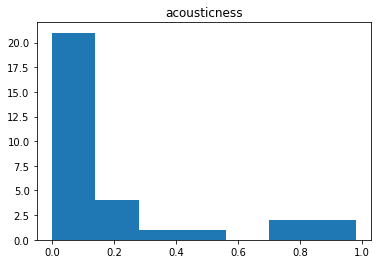

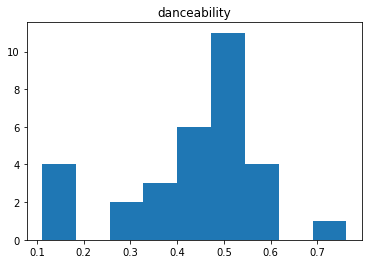

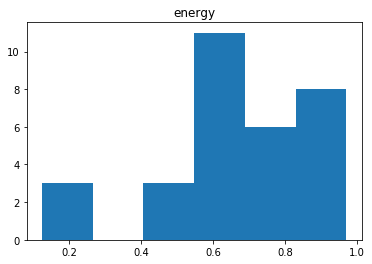

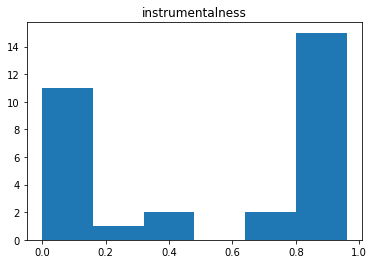

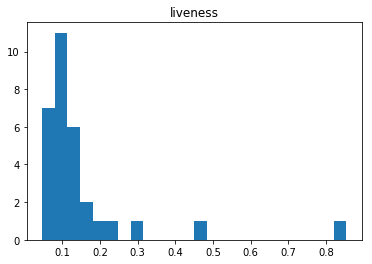

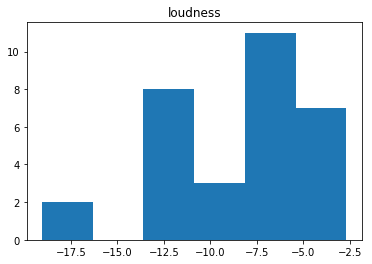

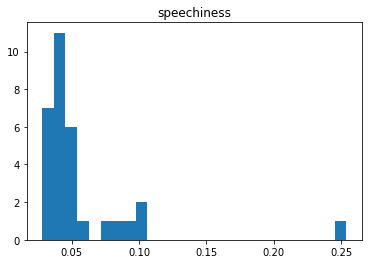

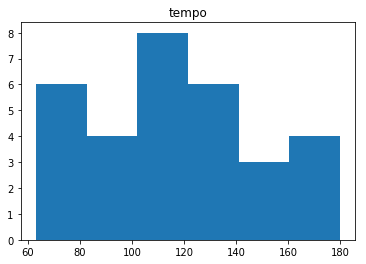

In [85]:
draw_feature_histograms()